The purpose of this notebook is to play around with different FFT parameters to visualize the time and frequency domain graphs and to see how the frequency resolution and total time are affected.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

1. 2^6 samples, 6.4 s, 0.15 Hz
2. 2^8 samples, 26 s, 0.04 Hz
3. 2^10 samples, 1.7 min, 0.01 Hz
4. 2^12 samples, 6.8 min, 0.0024 Hz
5. 2^13 samples, 14 min, 0.0012 Hz
6. 2^14 samples, 27 min, 0.0006 Hz

In [8]:
# sample rate
sr = 10
# total number of samples
n = 2**6
# total amount of time over which samples are taken
seconds = n / sr

resolution: 0.15625 Hz
time: 6.4 seconds = 0.10666666666666667 minutes
measured freq: 0.9375 Hz
actual freq: 1 Hz


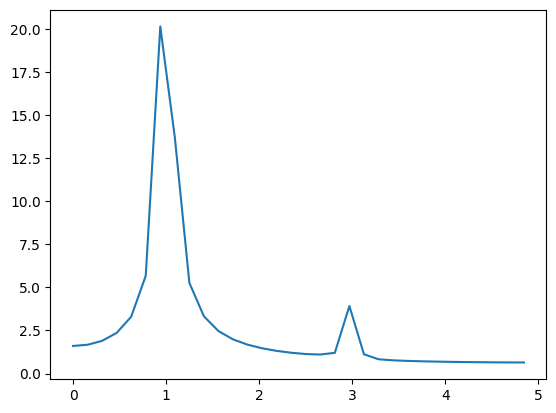

In [9]:
# array of time values (horizontal axis of time domain graph)
t = np.arange(n) / sr
# frequency of signal in Hz
freq = 1
# period of signal in seconds
per = 1/freq
# signal output (vertical axis of time domain graph)
# either sawtooth wave or triangle wave depending on the type of phase detector
SAWTOOTH = False
y = 4*((t + per/2) % per - per/2) if SAWTOOTH else 4*(abs((t + per/2) % per - per/2) - per/4)
# fourier transform of signal and take magnitudes of complex numbers
fy = abs(np.fft.fft(y))
# centers of frequency bins (horizontal axis of frequency domain graph)
f = np.fft.fftfreq(n, d = 1/sr)
# get rid of negative frequencies
fy = fy[0:math.ceil(n / 2)]
f = f[0:math.ceil(n / 2)]
# plot either frequency or time domain graph
TIME_DOMAIN = False
plt.plot(t, y) if TIME_DOMAIN else plt.plot(f, fy)
# find frequency of signal with maximum magnitude (which is typically the fundamental)
fmax = f[fy.argmax()]
print('resolution:', f[1], 'Hz')
print('time:', seconds, 'seconds', '=', seconds/60, 'minutes')
print('measured freq:', fmax, 'Hz')
print('actual freq:', freq, 'Hz')